# Lab: Predicting google stock market using RNN

**Recurrent Neural Networks** are the first of its kind State of the Art algorithms that can remember previous inputs in memory, when a huge set of sequential data is given to it.  RNN works on the principle of saving the output of a layer and feeding this back to the input in order to predict the output of the layer.  

Good prediction systems for the stock market, in this case predicting google stock, would help traders, investors, and analysts by providing information of the future direction of the stock market.    

Here we will be using an RNN to predict google stock.

**WARNING: For training purpose only, not investment advice :-)**

In [1]:
## Determine if we are running on google colab ///// Done

try:
    import google.colab
    RUNNING_IN_COLAB = True
except:
    RUNNING_IN_COLAB = False

print ("Running in Google COLAB : ", RUNNING_IN_COLAB)

Running in Google COLAB :  False


**TensorFlow** is a free and open-source software library for dataflow and differentiable programming across a range of tasks.  
It is a symbolic math library, and is also used for machine learning applications such as neural networks.  

In [2]:
## Selecting Tensorflow 2.0
try:
  %tensorflow_version  2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
print (keras.__version__)

2.2.4-tf


## Step 1: Load data
**Google stock market** dataset is a common educational csv dataset containing like 1,278 rows.  
This is historical stock data collected from the google stock price.  

In [3]:
import pandas as pd

data_train = 'https://elephantscale-public.s3.amazonaws.com/data/stocks/google-stock-price-train.csv'
data_test = 'https://elephantscale-public.s3.amazonaws.com/data/stocks/google-stock-price-test.csv'

dataset = pd.read_csv(data_train,index_col="Date",parse_dates=True, thousands=',')

## Step 2: Explore data
We will be given stock google stock price data with **Date**, **Open** price, **High** Price, **Low** Price, **Close** price, and **Volume** of shares that changed hands.   

In [4]:
dataset

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500
2012-01-04,331.27,333.87,329.08,666.45,5749400
2012-01-05,329.83,330.75,326.89,657.21,6590300
2012-01-06,328.34,328.77,323.68,648.24,5405900
2012-01-09,322.04,322.29,309.46,620.76,11688800
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,623400
2016-12-27,790.68,797.86,787.66,791.55,789100
2016-12-28,793.70,794.23,783.20,785.05,1153800


## Step 3: Preprocessing

Here are the steps for our preprocessing 
 - **Data discretization:** Part of data reduction but with particular importance, especially for numerical data.  
 - **Data transformation:** Normalization.  
 - **Data Cleaning:** Fill in missing values.  
 - **Data integration:** Integration of data files. After the dataset is transformed into a clean dataset, the dataset is divided into training and testing sets so as to evaluate.


In [5]:
#Data cleaning

from sklearn.preprocessing import MinMaxScaler

dataset.isna().any()# Feature Scaling Normalization
#Transform features by scaling each feature between 0 - 1
sc = MinMaxScaler(feature_range = (0, 1)) 

training_set_scaled = sc.fit_transform(dataset)  #Feature extractor then takes data and returns some transformed data back

training_set_scaled

array([[0.08581368, 0.09640129, 0.09044931, 0.23757287, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.24151427, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.22878051, 0.26361233],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.40495845, 0.04589107],
       [0.93796041, 0.94257381, 0.95033338, 0.40184391, 0.02949139],
       [0.93688146, 0.93669113, 0.93421352, 0.38672602, 0.07056868]])

## Step 4: Shape data
Shaping the data so we can have it suitable to work with.  

In [6]:
import numpy as np

## Data structure with 60 timesteps and 1 output
time_steps = 60

x_train = []
y_train = []
for i in range(time_steps, len(dataset)):
    x_train.append(training_set_scaled[i-time_steps:i, 0]) 
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [7]:
for i in range(3):
  print("Independent feature values are: ")
  print( x_train[i], end='')
  print("Dependent feature value is :" , y_train[i])
  print ('------')

Independent feature values are: 
[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]
 [0.0643277 ]
 [0.0585423 ]
 [0.06568569]
 [0.06109085]
 [0.06639259]
 [0.0614257 ]
 [0.07474514]
 [0.02797827]
 [0.02379269]
 [0.02409033]
 [0.0159238 ]
 [0.01078949]
 [0.00967334]
 [0.01642607]
 [0.02100231]
 [0.02280676]
 [0.02273235]
 [0.02810849]
 [0.03212665]
 [0.0433812 ]
 [0.04475779]
 [0.04790163]
 [0.0440695 ]
 [0.04648783]
 [0.04745517]
 [0.04873875]
 [0.03936305]
 [0.04137213]
 [0.04034898]
 [0.04784582]
 [0.04325099]
 [0.04356723]
 [0.04286033]
 [0.04602277]
 [0.05398467]
 [0.05738894]
 [0.05714711]
 [0.05569611]
 [0.04421832]
 [0.04514845]
 [0.04605997]
 [0.04412531]
 [0.03675869]
 [0.04486941]
 [0.05065481]
 [0.05214302]
 [0.05612397]
 [0.05818885]
 [0.06540665]
 [0.06882953]
 [0.07243843]
 [0.07993526]
 [0.07846566]
 [0.08034452]
 [0.08497656]]Dependent feature value is : 0.08627874097775134
------
Independent feature values are: 
[[0.09701243]
 [0.09433366]
 [0.091561

## Step 5: Build model
Build a model or set of models to solve the problem, test how well they perform and iterate until you have a model that gives satisfactory results.  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 60, 64)            4224      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________


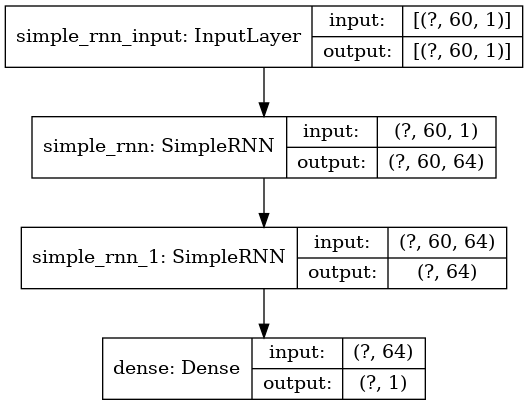

In [8]:
# Initialising the RNN
model = tf.keras.Sequential()

# Adding the first RNN Layer
#The model needs to know what input shape it should expect. 
#For this reason, the first layer in a Sequential model needs to receive information about its input shape.
#Only the first, because following layers can do automatic shape inference. 
model.add(tf.keras.layers.SimpleRNN(units = 64, return_sequences = True, input_shape = (x_train.shape[1], 1)))

# Adding a 2nd RNN layer
model.add(tf.keras.layers.SimpleRNN(units = 64))

# Adding the output layer
# only need 1 neuron for regression
model.add(tf.keras.layers.Dense(units = 1))

model.summary()
# Plotting the model
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

## Step 6 : Add Tensorboard

**TensorBoard** provides the visualization and tooling needed for machine learning experimentation.  

In [9]:
## This is fairly boiler plate code

import datetime
import os
import shutil

app_name = 'rnn-stocks'

# timestamp  = datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S")

tb_top_level_dir= '/tmp/tensorboard-logs'

tb_app_dir = os.path.join (tb_top_level_dir, app_name)

tb_logs_dir = os.path.join (tb_app_dir, datetime.datetime.now().strftime("%H-%M-%S"))


print ("Saving TB logs to : " , tb_logs_dir)

#clear out old logs
shutil.rmtree ( tb_app_dir, ignore_errors=True )

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_logs_dir, write_graph=True, 
                                                      write_images=True, histogram_freq=1)

## This will embed Tensorboard right here in jupyter!
%load_ext tensorboard
%tensorboard --logdir $tb_logs_dir

Saving TB logs to :  /tmp/tensorboard-logs/rnn-google-stock/2020-03-12--23-20-16


## Step 7: Train 

 - Optimizer **Adam**, which is an adaptive learning rate optimization algorithm that's been designed specifically for training deep neural networks.  
 - **Mean Squared Error Loss**, it is the preferred loss function under the inference framework of maximum likelihood if the distribution of the target variable is Gaussian. It is the loss function to be evaluated first and only changed if you have a good reason.  

In [10]:
%%time

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mse', metrics=['mse'])
print ("training starting ...")

# Fitting the RNN to the Training set
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, callbacks=[tensorboard_callback])

print ("training done.")

training starting ...
Train on 1198 samples
Epoch 1/10
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0080 - mse: 0.0080
Epoch 2/10
1198/1198 [==============================] - 3s 2ms/sample - loss: 9.6037e-04 - mse: 9.6037e-04
Epoch 3/10
1198/1198 [==============================] - 3s 3ms/sample - loss: 9.4230e-04 - mse: 9.4230e-04
Epoch 4/10
1198/1198 [==============================] - 3s 3ms/sample - loss: 8.0177e-04 - mse: 8.0177e-04
Epoch 5/10
1198/1198 [==============================] - 3s 2ms/sample - loss: 9.5476e-04 - mse: 9.5476e-04
Epoch 6/10
1198/1198 [==============================] - 3s 3ms/sample - loss: 7.1142e-04 - mse: 7.1142e-04
Epoch 7/10
1198/1198 [==============================] - 3s 3ms/sample - loss: 5.3542e-04 - mse: 5.3542e-04
Epoch 8/10
1198/1198 [==============================] - 3s 3ms/sample - loss: 6.1343e-04 - mse: 6.1343e-04
Epoch 9/10
1198/1198 [==============================] - 3s 3ms/sample - loss: 6.6175e-04 - mse: 6.6175e-04
E

## Step 8: Training History

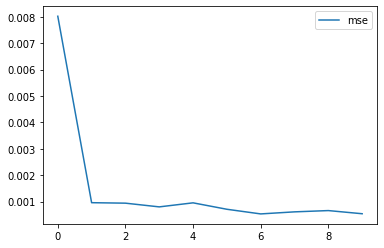

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['mse'], label='mse')
plt.legend()
plt.show()

## Step 9: Predict
We will now test the model with our Google_Stock_Price_Test.csv.  


In [12]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv(data_test,index_col="Date",parse_dates=True, thousands = ',')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)

# Getting the last 80 values
inputs = dataset_total[len(dataset_total) - len(dataset_test) - time_steps:].values

inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)
x_test = []
# 
for i in range(time_steps, time_steps+20):
    x_test.append(inputs[i-time_steps:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

predicted_stock_price

array([[787.94946],
       [785.89844],
       [790.56335],
       [786.18414],
       [792.15326],
       [793.9601 ],
       [804.7995 ],
       [805.3235 ],
       [807.12036],
       [806.44336],
       [807.51764],
       [806.30585],
       [805.4742 ],
       [806.33405],
       [809.05524],
       [813.6306 ],
       [821.7409 ],
       [828.9977 ],
       [831.62396],
       [827.2896 ]], dtype=float32)

## Step 10: Visualize result
### 10.1: Compare real stock price with prediction

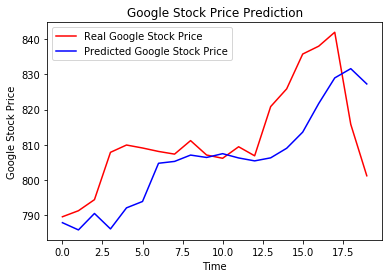

In [13]:
import matplotlib.pyplot as plt
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### 10.2: Rolling Mean on Time series
A rolling analysis of a time series model is often used to assess the model’s stability over time. When analyzing financial time series data using a statistical model, a key assumption is that the parameters of the model are constant over time

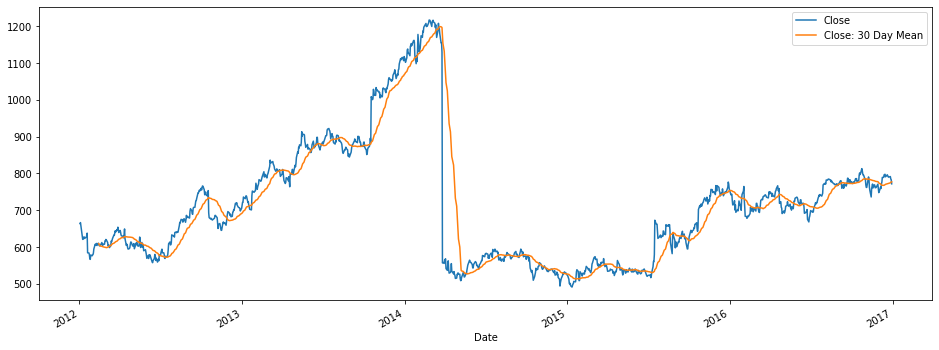

In [14]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

## 10.3: Stocks opening representation over the period of time

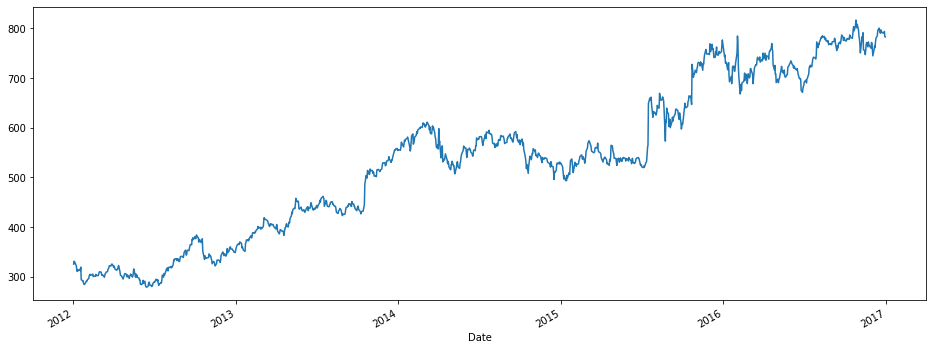

In [15]:
dataset['Open'].plot(figsize=(16,6))

## Step 11: Class Discussion
Discuss your findings

### Source:
https://blog.usejournal.com/stock-market-prediction-by-recurrent-neural-network-on-lstm-model-56de700bff68